## DSI-06 Homework 2: ANSWERS
From Chapter 3, found on pages 129-130 of ISLP

*This question involves the use of simple linear regression on the Auto data set*

In [5]:
# Import standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm
import warnings # for muting warning messages

# mute warning messages
warnings.filterwarnings('ignore')
# Import specific objects
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import OLSInfluence
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)

# Load dataset
Auto = load_data('Auto')
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


a)	Produce a scatterplot matrix which includes all of the variables in the data set.

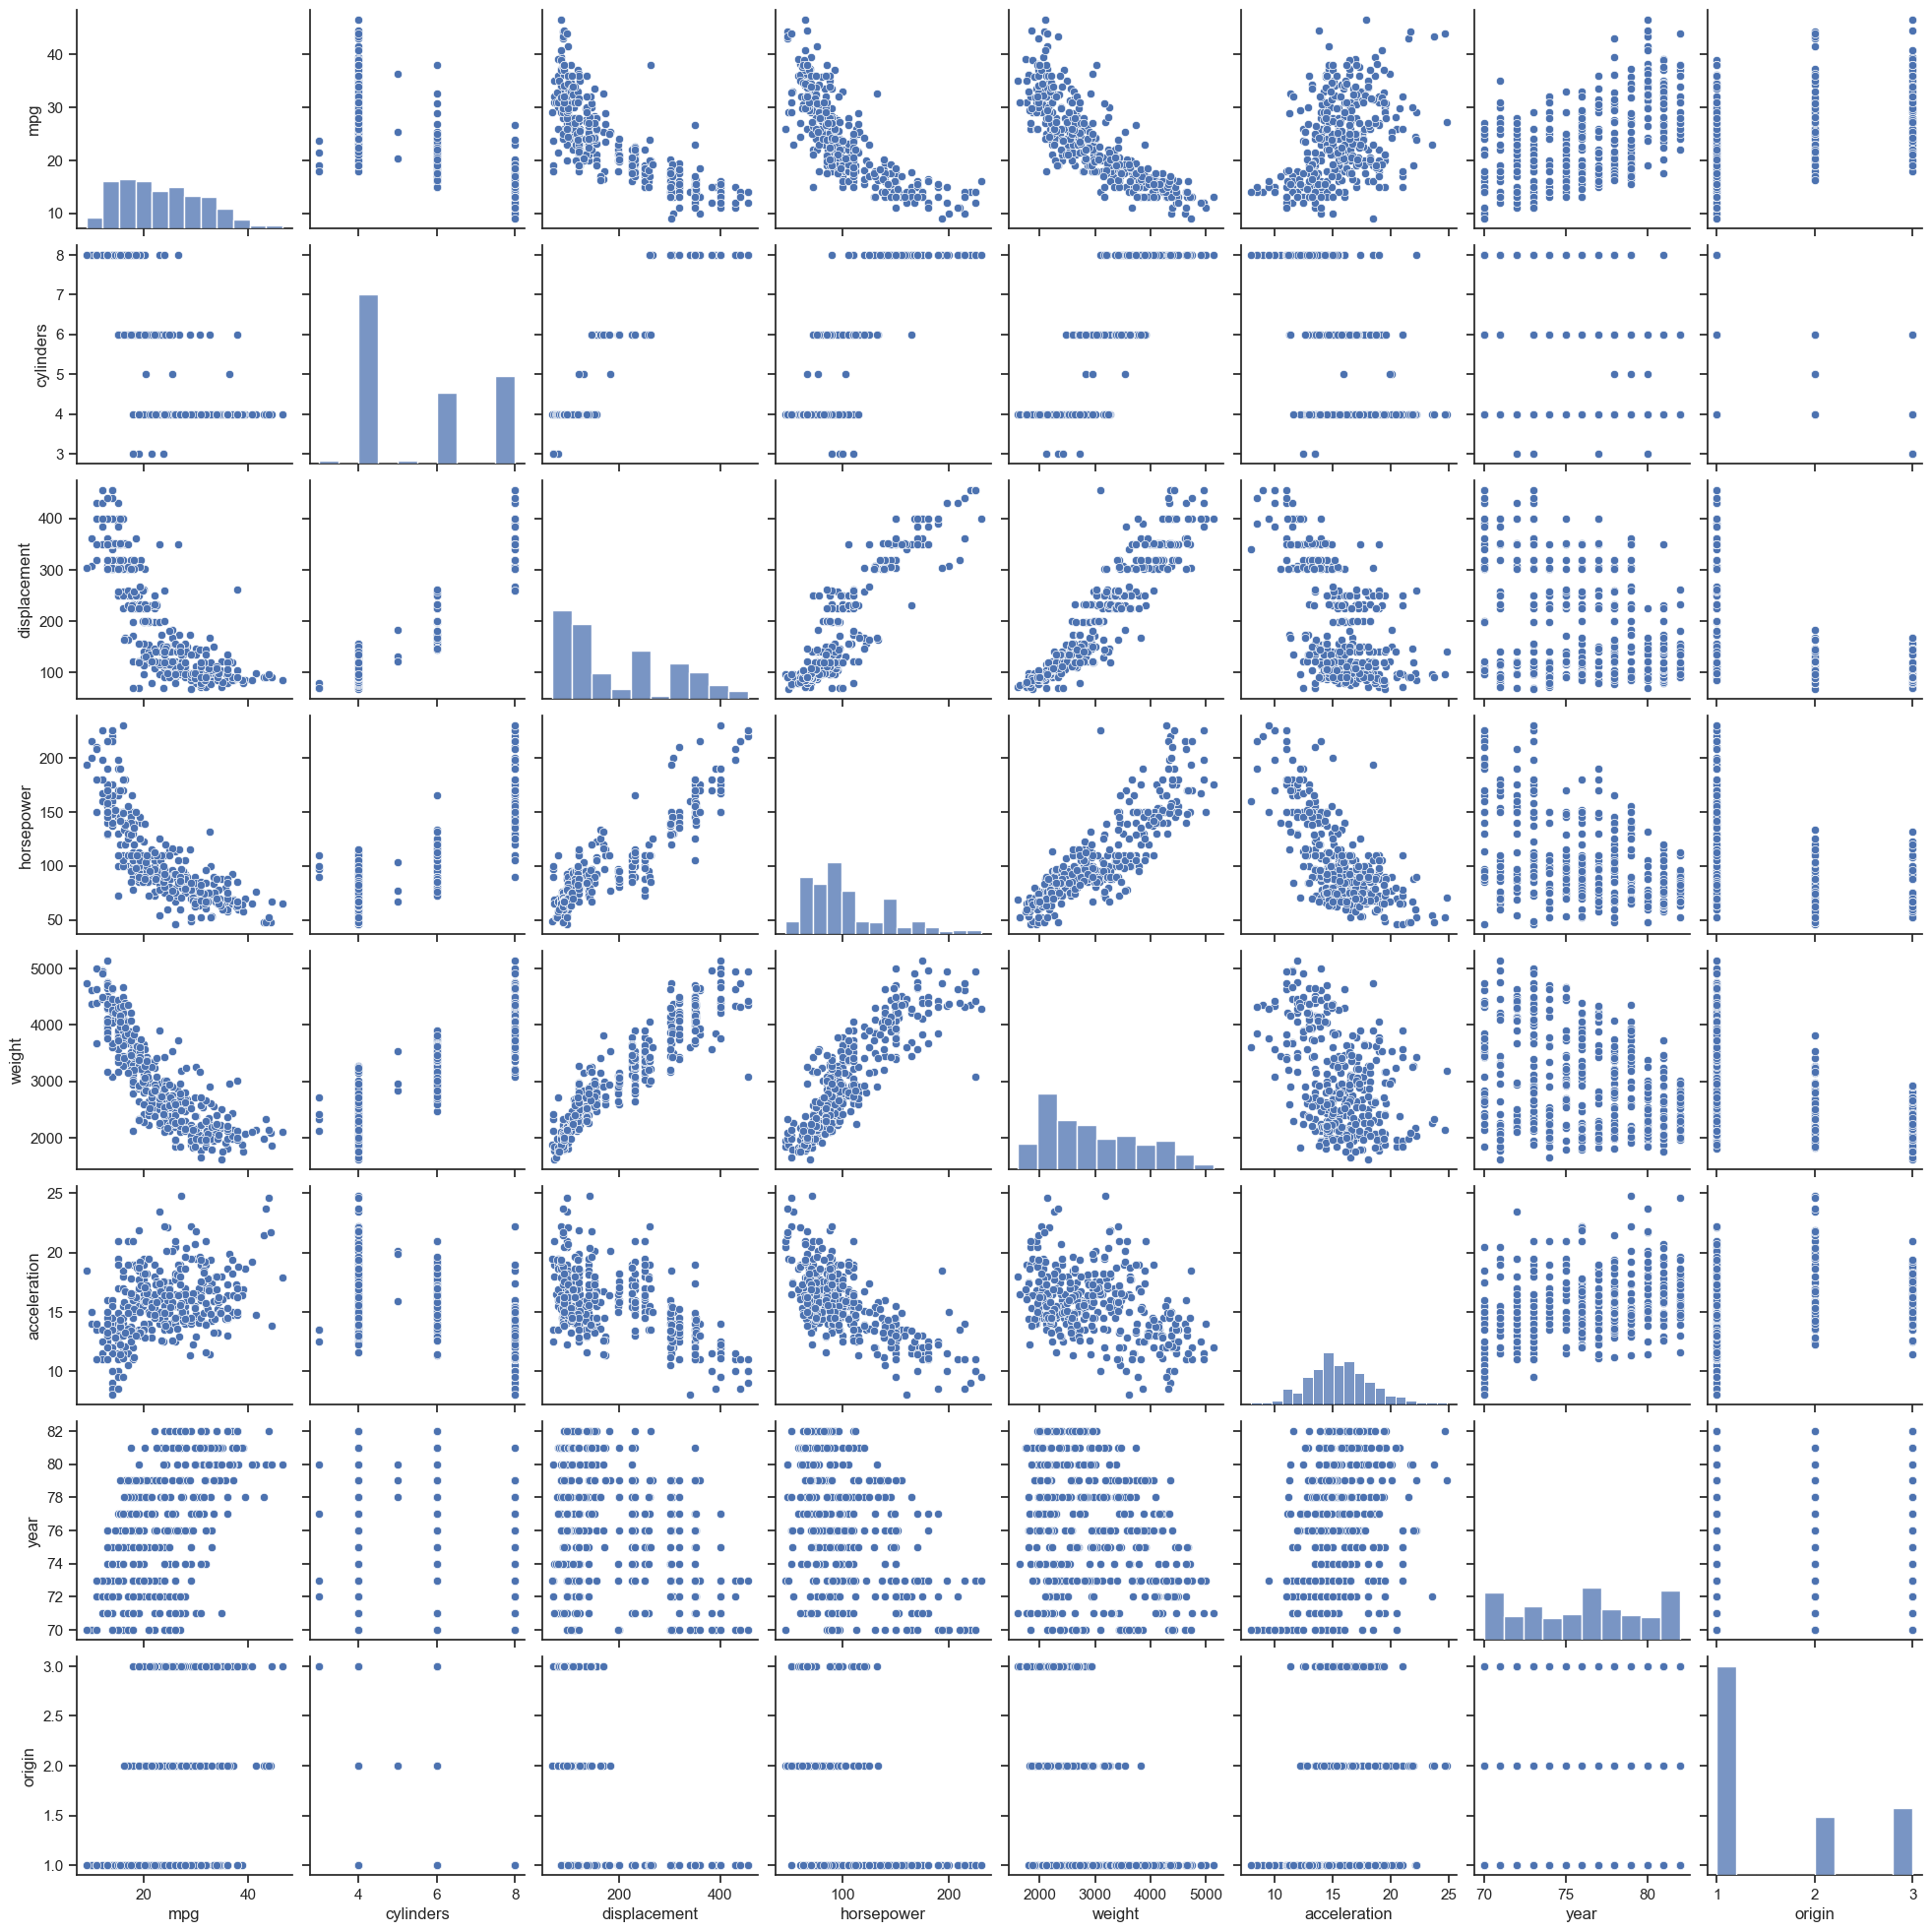

In [6]:
numeric_columns = Auto.select_dtypes(include=['float64', 'int64'])

# Create a scatterplot matrix
sns.set(style="ticks")
sns.pairplot(numeric_columns)
plt.show()

b)	Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

In [7]:
# Compute
correlation_matrix = Auto.corr()

# Display the correlation matrix
correlation_matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


c) Use the `sm.OLS()` function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the `summarize()` function to print the results. Comment on the output: 

(i)  Is there a relationship between the predictors and the response? 

*We see there is a relationship between the predictors and the response (large F-statistic, p-value for the
overall model is significant.*

(ii) Which predictors appear to have a statistically significant relationship to the response?

*Displacement, weight, year and origin seem to have a statistically significant relationship to mpg (sig p-values)*

(iii) What does the coefficient for the year variable suggest?

*The coefficient for the year variable suggests, per every unit increase of year there is a corresponding
increase in mpg by 0.7508, assuming all other predictors are held constant.*

In [8]:
X = Auto.drop(['mpg', 'name'], axis=1)  # Exclude 'name' and 'mpg'
y = Auto['mpg']  # Response variable

# Add a constant term to the predictors (intercept)
X = sm.add_constant(X)

# Fit the OLS model
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results summary
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 16 Mar 2024   Prob (F-statistic):          2.04e-139
Time:                        11:29:50   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

In [9]:
summarize(results)

,coef,std err,t,P>|t|
const,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

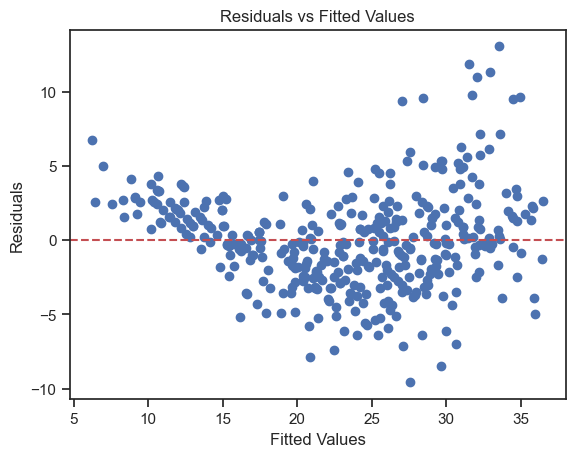

In [10]:
# Residuals vs Fitted Values
fitted_values = results.fittedvalues
residuals = results.resid

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

There is a slight trend in the residuals illustrated by the red curve which could indicate patterns in the data
that are not captured by the linear model.

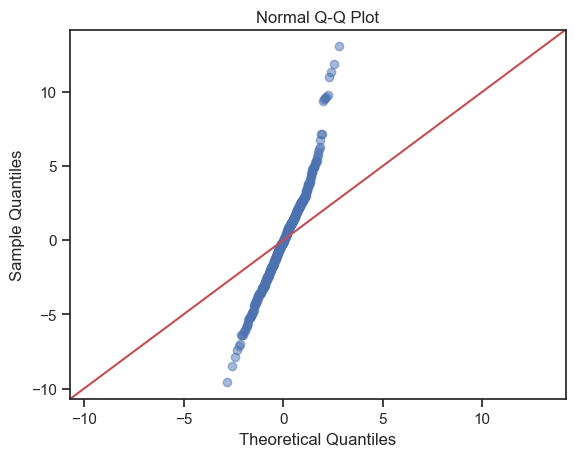

In [11]:
# QQ Plot
qq_plot = ProbPlot(residuals)
qq_plot.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
plt.title('Normal Q-Q Plot')
plt.show()

The Q-Q plot shows some linearity of the data up to the 2nd theoretical quantile, however after that the
residuals vs fitted plot seems to deviate from the line.

e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

Answer depends on the interactions tried

f) Try a few different transformations of the variables, such as log⁡(X),√X,X^2. Comment on your findings.

Answer depends on the transformations tried